# Projet DATA : Prédiction de la météo

Martin J

Projet de prédiction de la météo à Paris en utilisant les données de [Meteonet](https://meteonet.umr-cnrm.fr/).

## Analyse du problème

Objectif : Prédire la météo à Paris en ayant les données météorologiques des stations du quart nord-ouest et du quart sud-est de la France.
Nous avons en donnée d'entrée une date, des coordonnées de latitude, longitude et la hauteur, et nous voulons que le modèle prévoit la météo de cette date.

**Pour simplifier nous allons essayer de déterminer la température à Paris sur 24h connaissant toutes les données sur les 7 derniers jours sur un certains nombre de station**

**Modules nécessaires :**
* [pandas]() pour la manipulation de données 
* [seaborn]() pour l'affichage des données
* [matplotlib]() pour les graphes
* [cartopy](https://scitools.org.uk/cartopy/docs/latest/) pour afficher la carte de France
* [datetime]() pour la gestion des dates 
* [numpy]() pour le calcul vectoriel et la manipulation des `numpy.ndarray`

## Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from time import time
from datetime import timedelta, datetime  
import seaborn as sb

mpl.style.use('ggplot')

## Import des données
Nous allons d'abord importer et visualiser l'ensemble des données pour l'année 2016.

Telecharger `NW_Ground_Stations_2016.csv` sur le site de Meteonet ou sur leur page Kaggle. Renseigner le chemin de ce fichier dans `fname` 

In [2]:
year = '2016'
fname = 'data/NW_Ground_Stations_'+year+".csv"
df = pd.read_csv(fname,parse_dates=[4],infer_datetime_format=True)
df.head(25)

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,14066001,49.330,-0.430,2.0,2016-01-01,210.0,4.4,0.0,91.0,278.45,279.85,NaN
1,14126001,49.150,0.040,125.0,2016-01-01,NaN,NaN,0.0,99.0,278.35,278.45,NaN
2,14137001,49.180,-0.460,67.0,2016-01-01,220.0,0.6,0.0,92.0,276.45,277.65,102360.0
3,14216001,48.930,-0.150,155.0,2016-01-01,220.0,1.9,0.0,95.0,278.25,278.95,NaN
4,14296001,48.800,-1.030,339.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,278.35,NaN
5,14357002,48.930,-0.690,223.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,277.65,NaN
6,14366002,49.170,0.230,62.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,279.55,NaN
7,14372001,49.102,-0.765,184.0,2016-01-01,230.0,4.1,0.0,92.0,278.05,279.25,NaN
8,14501002,48.890,-0.390,185.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,278.35,NaN
9,14515001,49.350,-0.770,68.0,2016-01-01,220.0,5.1,NaN,NaN,NaN,NaN,NaN


# 1. Exploration de la base de données

#### A quoi correspondent les différents paramètres ?

`number_sta` : numéro de la station

`lat` : latitude

`lon` : longitude

`height_sta` : la hauteur de la station en mètre

`date` : la date

`dd` : la direction du vent

`ff` : la vitesse du vent en mètre par seconde

`precip` : la précipitation pendant la durée d'enregistrement en kg.m^2

`hu` : l'humidité en %

`td` : la température de condensation en Kelvin

`t` : la température en Kelvin

`psl` : la pression amené au niveau de la mer

## Traitement des données
On remarque que certains paramètres sont souvent NaN, voyons la proportion pour chacun d'entre eux.

In [3]:
df.isnull().sum()/df.shape[0]

number_sta    0.000000
lat           0.000000
lon           0.000000
height_sta    0.000000
date          0.000000
dd            0.401370
ff            0.400872
precip        0.059082
hu            0.415354
td            0.415693
t             0.162504
psl           0.799442
dtype: float64

On constate que la pression a 80% de valeur "non indiquée" et que le numéro de la station n'est qu'un identifiant.

On décidera donc de ne pas prendre en compte la pression dans certains cas, car elle a une trop grande proportion NaN, ni le numbe_sta, car il s'agit uniquement d'un identifiant.

In [4]:
df = df.iloc[:,0:-1]
df.head(15)

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t
0,14066001,49.330,-0.430,2.0,2016-01-01,210.0,4.4,0.0,91.0,278.45,279.85
1,14126001,49.150,0.040,125.0,2016-01-01,NaN,NaN,0.0,99.0,278.35,278.45
2,14137001,49.180,-0.460,67.0,2016-01-01,220.0,0.6,0.0,92.0,276.45,277.65
3,14216001,48.930,-0.150,155.0,2016-01-01,220.0,1.9,0.0,95.0,278.25,278.95
4,14296001,48.800,-1.030,339.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,278.35
5,14357002,48.930,-0.690,223.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,277.65
6,14366002,49.170,0.230,62.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,279.55
7,14372001,49.102,-0.765,184.0,2016-01-01,230.0,4.1,0.0,92.0,278.05,279.25
8,14501002,48.890,-0.390,185.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,278.35
9,14515001,49.350,-0.770,68.0,2016-01-01,220.0,5.1,NaN,NaN,NaN,NaN


## Visualisation des données pour une seule date

Pour visualiser les données on affiche la température en fonction de la latitude et la longitude.

In [5]:
date =  '20160101'
d_sub = df[df['date'] == date]
d_sub.head(10)

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t
0,14066001,49.330,-0.430,2.0,2016-01-01,210.0,4.4,0.0,91.0,278.45,279.85
1,14126001,49.150,0.040,125.0,2016-01-01,NaN,NaN,0.0,99.0,278.35,278.45
2,14137001,49.180,-0.460,67.0,2016-01-01,220.0,0.6,0.0,92.0,276.45,277.65
3,14216001,48.930,-0.150,155.0,2016-01-01,220.0,1.9,0.0,95.0,278.25,278.95
4,14296001,48.800,-1.030,339.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,278.35
5,14357002,48.930,-0.690,223.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,277.65
6,14366002,49.170,0.230,62.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,279.55
7,14372001,49.102,-0.765,184.0,2016-01-01,230.0,4.1,0.0,92.0,278.05,279.25
8,14501002,48.890,-0.390,185.0,2016-01-01,NaN,NaN,0.0,NaN,NaN,278.35
9,14515001,49.350,-0.770,68.0,2016-01-01,220.0,5.1,NaN,NaN,NaN,NaN


In [6]:
d_sub.iloc[1]

number_sta               14126001
lat                         49.15
lon                          0.04
height_sta                  125.0
date          2016-01-01 00:00:00
dd                            NaN
ff                            NaN
precip                        0.0
hu                           99.0
td                         278.35
t                          278.45
Name: 1, dtype: object

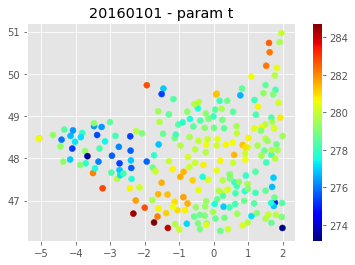

In [7]:
param = 't'
plt.scatter(d_sub['lon'], d_sub['lat'], c=d_sub[param], cmap='jet')
plt.colorbar()
plt.title(date+' - param '+param)

plt.show()

On voit donc que la température le premier janvier à minuit, dans le quart nord-est de la France est autour de 7 °C.

Pour réalisation du projet, nous allons tout d'abord nous concentré sur une seule station.

# Etude des données pour une seule station

Nous allons tout d'abord étudier statisquement l'évolution des conditions météorologique dans une seule station (la première de la base de données) tous les jours à midi.

#### Création d'un dataframe avec une seule station et des données tous les jours à midi.

In [8]:
number_station = 14066001
hour = "12:00:00"
date0 = dt.datetime.fromisoformat('2016-01-01T'+hour)
data0 = df[df['date'] == date0]
delta = timedelta(days=1)
time_range = [date0+i*delta for i in range(365)]
df1 = df.set_index('date').loc[time_range].reset_index(inplace=False)
print(df1.shape)
df1.head()


(90735, 11)


,date,number_sta,lat,lon,height_sta,dd,ff,precip,hu,td,t
0,2016-01-01 12:00:00,14066001,49.33,-0.43,2.0,140.0,3.3,0.0,92.0,280.65,281.85
1,2016-01-01 12:00:00,14126001,49.15,0.04,125.0,NaN,NaN,0.0,99.0,281.95,282.05
2,2016-01-01 12:00:00,14137001,49.18,-0.46,67.0,140.0,5.1,0.0,94.0,280.85,281.75
3,2016-01-01 12:00:00,14216001,48.93,-0.15,155.0,150.0,3.8,0.0,91.0,279.65,281.05
4,2016-01-01 12:00:00,14296001,48.80,-1.03,339.0,NaN,NaN,0.0,NaN,NaN,279.85


#### Sélection d'un paramètre pertinent

In [9]:
params = ["date", "precip", "hu", "td", "t","ff"]

df_week = df1[df1["number_sta"] == number_station]
df_week = df_week[params].dropna()
print(df_week.shape)
df_week.reset_index(inplace=True)
df_week.drop(columns=["index"], inplace=True)
df_week.head()

(355, 6)


,date,precip,hu,td,t,ff
0,2016-01-01 12:00:00,0.0,92.0,280.65,281.85,3.3
1,2016-01-02 12:00:00,0.0,88.0,280.95,282.85,11.8
2,2016-01-03 12:00:00,0.2,84.0,280.15,282.75,9.2
3,2016-01-04 12:00:00,0.0,72.0,278.55,283.35,9.2
4,2016-01-05 12:00:00,0.0,77.0,279.15,282.95,8.4


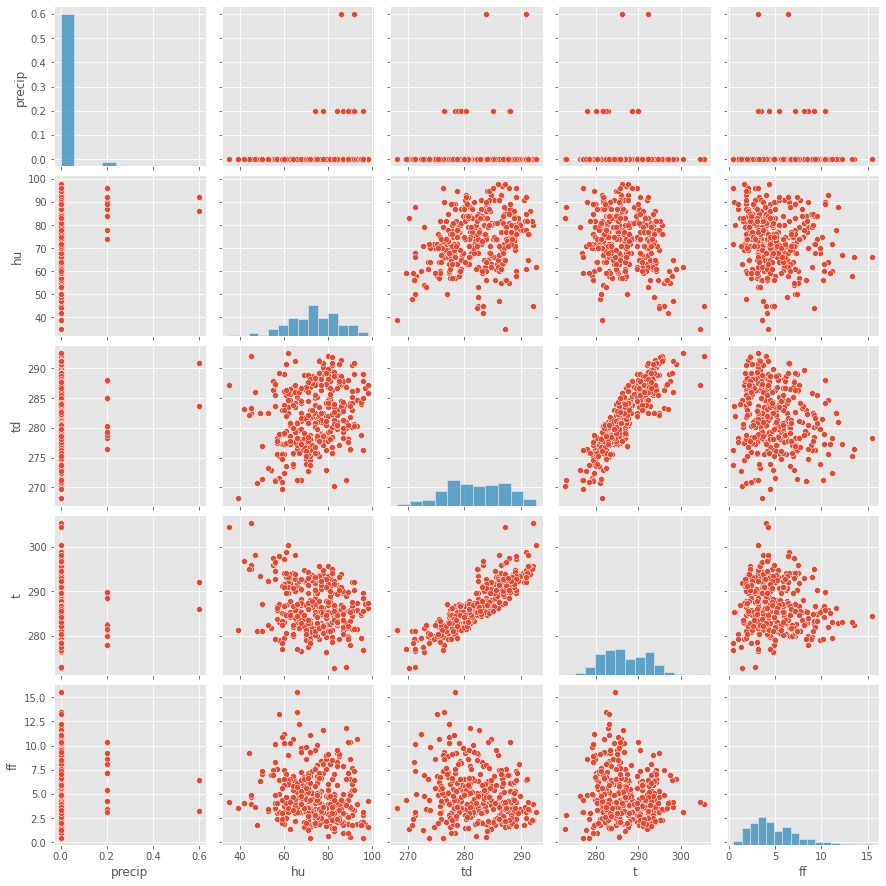

In [10]:
sb.pairplot(df_week)

<AxesSubplot:>

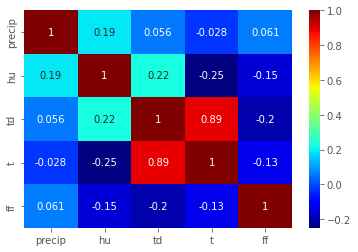

In [11]:
sb.heatmap(df_week.corr(),cmap='jet',annot=True)

## Analyse

On obtient premièrement une analyse statistique graphique (avec pairplot) qui lie chacun des paramètres entre eux.

On peut voir que la température t et la température de condensation td sont très liée, car les nuages de points ont dans les dexu cas l'allure d'une droite.

Aussi, on remarque tous les paramètres sauf la précipitation et la vitesse du vent sont réparties sous forme de gaussienne.


Enfin on affiche la matrice contenant les coefficients de corrélation entre chacun des paramètres. Comme dit plus tôt, on voit un lien très fort entre `t` et `td`.

Il existe également des corrélations notables entre `t` et `hu`, `td` et `hu`, et enfin `hu` et `precip`

---

## 2. Implémentation du modèle

### 2.1 Traitement des données

On présente ci-dessous une fonction qui prépare les données :

Elle prend en entrée la dataframe brute et : 
* Selectionne les données pour l'entrainement (1 semaine)
* Selectionne les données pour la prédiction (24h apres)
* Selectionne les `n_stations` les plus proches de Paris

Retourne un dataframe pour les données d'entrainement et un dataframe pour la prédiction

In [12]:
N_STA = 6  # Paramètre concernant le nombre de station utilisées par la suite
LAT_PARIS = 48.8
LON_PARIS = 2.35

In [13]:
def data_prep(df,t0=None, t1=None, n_stations=3, verbose=False):
    """
    Prepare les données pour l'analyse
    
    args
    - t0 : temps initial des données d'apprentissage
    - t1 : temps final des données d'apprentissage
        -> t2 = t1 + 24h => on cherche a prédire entre t1 et t2
    - n_stations : nombre de stations plus proche de Paris 
    """
    # Args
    if t0 is None :
        t0 = datetime.fromisoformat('2016-09-10T00:00:00')
    if t1 is None:
        t1 = datetime.fromisoformat('2016-09-18T00:00:00')
    
    # Select stations in df_temp
    lat_Paris = LAT_PARIS
    long_Paris = LON_PARIS
    
    all_stations = df[['number_sta','lat','lon']].drop_duplicates(subset=['number_sta']).reset_index(drop=True)
    all_stations['dist'] = (df["lat"].sub(lat_Paris).pow(2) + df["lon"].sub(long_Paris).pow(2)).pow(0.5)
    
    assert n_stations < all_stations.shape[0], "Le nombre de stations sélectionnées doit etre inferieur au nombre de station total"
    id_stations = all_stations.nsmallest(n_stations,'dist')['number_sta'] 
    dist_sta = all_stations.nsmallest(n_stations,'dist')
    if verbose:
        print(list(id_stations))
    
    df_temp = df[df['number_sta'].isin(id_stations)]
    
    # Split entrainement prédiction
    # Select times
    t2 = t1 + timedelta(days=1)
    
    mask1 = (df['date'] >= t0) & (df['date'] < t1)
    mask2 = (df['date'] >= t1) & (df['date'] < t2)
    
    df_train = df_temp.loc[mask1]
    df_test = df_temp.loc[mask2]
    
    return df_train, df_test, id_stations, dist_sta

In [14]:
# Data prepation
df_sta, df_pred, id_stations, dist_sta = data_prep(df,verbose=True,n_stations=N_STA)

[91200002, 78140001, 78562001, 78465001, 60322001, 78354001]


On présente ensuite une fonction qui va couper les dataframes en un dictionnaire de dataframes par station: 

Ce dictionnaire est de forme `{id_station : dataframe_de_cette_station}`

In [15]:
def split_df_by_station(df):
    """
    renvoie une dataframe pour chaque station
    
    return : tuple of array-like of dataframes
    """
    dfs = {}
    stations = list(df['number_sta'].drop_duplicates())
    #print(stations)
    
    for id_sta in stations:
        df_sta = df[df["number_sta"] == id_sta]
        df_sta = df_sta.reset_index(drop=True)
        dfs[id_sta] = df_sta
    return dfs

In [16]:
# Splitting :
dfs_train = split_df_by_station(df_sta)
dfs_test  = split_df_by_station(df_pred)

On a ensuite une fonction qui permet de nettoyer les dataframes :
* Drop la colonne `number_sta`
* Dates -> int
* Drop des colonnes qui contiennent plus de `dropping_limit` de valeurs `NaN`
    -> pose problème dans certains cas

In [17]:
def clean_df(df,dropping_limit=0.5):
    number_sta = str(df.loc[0,"number_sta"])

    # Drop number sta
    df = df.drop(columns=['number_sta'])
    
    # converting date to timestamp
    #df['date'] = df['date'].astype(int)
    df['date'] = df['date'].apply(lambda x:x.value)
    
    #calcul du nombre de nan values
    df_null = df.isnull().sum()/df.shape[0] # dataframe des pourcentges de valeurs nulles
    
    columns_to_drop = [id_ for id_ in df_null.index if df_null[id_] >= dropping_limit]
    
    # suppr les colonnes ou les nan sont trop nombreuses
    assert 't' not in columns_to_drop
    df = df.drop(columns=columns_to_drop)
    
    df = df.dropna()
    
    return df.reset_index(drop=True)

def clean(dfs):
    d = {}
    for index,df in dfs.items():
        d[index] = clean_df(df)
    return d

In [18]:
# Cleaning
dfs_train = clean(dfs_train)
dfs_test = clean(dfs_test)

In [19]:
dfs_train[id_stations.iloc[0]]

,lat,lon,height_sta,date,dd,ff,precip,hu,td,t
0,48.527,1.995,116.0,1473465600000000000,0.0,0.0,0.0,93.0,282.95,284.05
1,48.527,1.995,116.0,1473465960000000000,260.0,0.5,0.0,94.0,283.25,284.15
2,48.527,1.995,116.0,1473466320000000000,260.0,0.8,0.0,94.0,283.25,284.15
3,48.527,1.995,116.0,1473466680000000000,260.0,0.9,0.0,95.0,283.35,284.15
4,48.527,1.995,116.0,1473467040000000000,270.0,1.0,0.0,94.0,283.05,283.95
...,...,...,...,...,...,...,...,...,...,...
1915,48.527,1.995,116.0,1474155000000000000,120.0,0.6,0.0,96.0,286.35,286.95
1916,48.527,1.995,116.0,1474155360000000000,110.0,1.0,0.0,97.0,286.45,286.95
1917,48.527,1.995,116.0,1474155720000000000,110.0,1.2,0.0,97.0,286.45,286.95
1918,48.527,1.995,116.0,1474156080000000000,100.0,1.1,0.0,97.0,286.45,286.95


Ensuite on implemente deux fonction pour afficher les températures en fonction des stations sélectionnées : 

In [20]:
def display_temp(dfs):
    n = len(dfs)
    fig,ax = plt.subplots(n,1,figsize = (15,n*5))
    fig.subplots_adjust(hspace=0.5)
    i = 0
    for index,df in dfs.items():
        dates = pd.to_datetime(df['date'])
        ax[i].plot(dates,df['t'])
        ax[i].set_title(f'[Station {index}] Evolution des températures entre le {dates[0]} et le {dates.iloc[-1]}')
        ax[i].set_xlabel('Temps')
        ax[i].set_ylabel('Température')
        i+=1

def display_all_in_one(dfs):
    fig = plt.figure(figsize=(15,7))
    i = 0
    for index,df in dfs.items():
        dates = pd.to_datetime(df['date'])
        plt.plot(dates,df['t'],label=f'station{index}')
        i+=1
    plt.legend()
    plt.title(f'Evolution des températures entre le {dates[0]} et le {dates.iloc[-1]} pour les {len(dfs)} stations')
    plt.xlabel('Temps')
    plt.ylabel('Température')

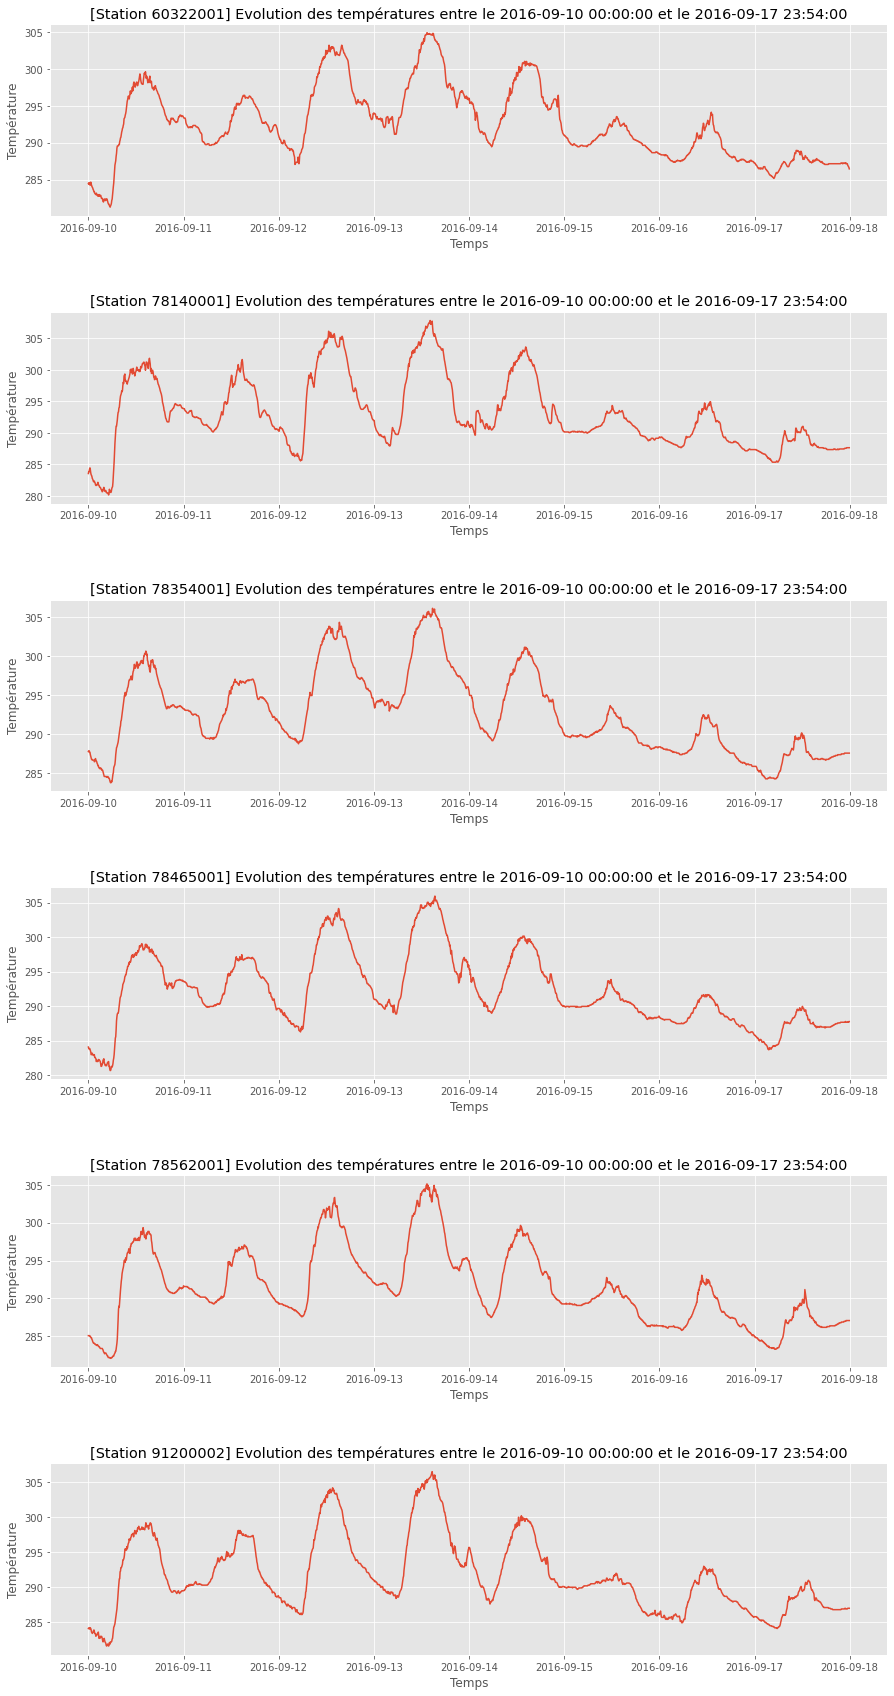

In [21]:
# Plotting
display_temp(dfs_train)

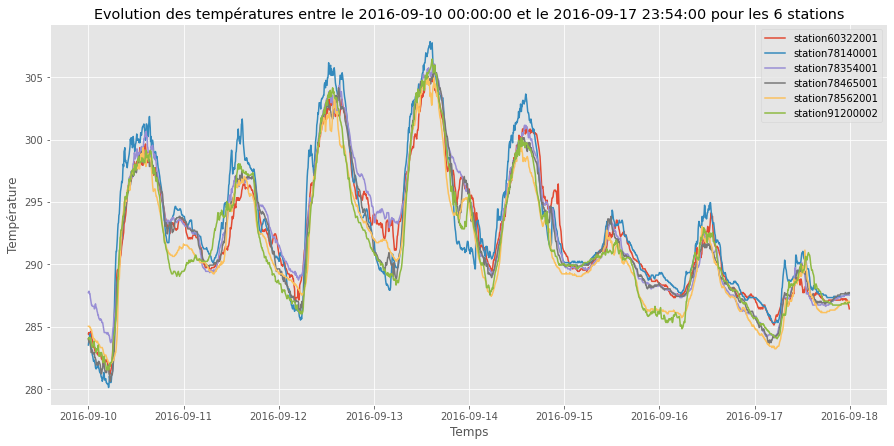

In [22]:
display_all_in_one(dfs_train)

## Preparation des données pour le modèle

On va séparer les données pour l'entrainement et le test. On va ensuite normaliser les données pour augmenter les performances du modèle

In [23]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

On va préparer les données en vue du modèle à l'aide de la fonction `prep`. Pour cela on va la séparer en deux dataframes qui représenteront X et y par la suite. 
On passe d'un dictionnaire de forme `{id_station : dataframe_station}` à `{id_station : (X_train, X_test, y_train, y_test, X_pred, y_pred)}`

* `X_train` : contient toutes les valeurs sauf la température pour des dates aléatoires (sur les 7 premiers jours) pour l'entrainement (proportion :`1-test_size`)
* `y_train`: contient les température associées aux dates de X_train (proportion :`1-test_size`)
* `X_test` : idem que X_train mais pour le test du modèle (proportion : `test_size`)
* `y_test` : idem que y_train mais pour le test du modèle (proportion : `test_size`)
* `X_pred` : contient toutes les valeurs sauf la température pour le huitième jour
* `y_pred`: contient les températures du huitième jour

La séparation en données d'entrainement et de test est réalisée par la fonction `sklearn.model_selection.train_test_split`

In [24]:
def prep_to_fit(df, test_size):
    """
    Crée la matrice X et le vecteur y en fonction de la dataframe pour le modèle (7 premiers jours)
    """
    X = df.loc[:,df.columns != 't']
    y = df['t']
    return list(train_test_split(X,y,test_size=test_size))

def prep_to_predict(df):
    """
    idem que prep_to_fit mais pour le prédict (8e jour)
    """
    return [df.drop(columns=['t']),df['t']]

def prep(dfs_train, dfs_test,test_size=0.25):
    """
    renvoie un array-like de tuple : (X_train, X_test, y_train, y_test, X_pred, y_pred)
    """
    d = {}
    for index,df in dfs_train.items():
        d[index] = tuple(prep_to_fit(dfs_train[index], test_size) + prep_to_predict(dfs_test[index]))
    return d

In [25]:
prep_data = prep(dfs_train, dfs_test)

On va ensuite normaliser les données avec `sklearn.preprocessing.StandardScaler`.
Cela permet d'augementer les performances du réseau de neurones.

On crée un `StandardScaler` par station

In [26]:
def scaling_data(prep_data):
    """
    normalise les données X selon  la normalisation de X_train
    """
    scalers = {}
    scaled_data = {}
     
    for index,(X_train0, X_test0, y_train, y_test, X_pred0, y_pred) in prep_data.items():
        scaler = StandardScaler()
        scaler.fit(X_train0)
        X_train = scaler.transform(X_train0)
        X_test = scaler.transform(X_test0)
        X_pred = scaler.transform(X_pred0)
        
        scalers[index] = scaler
        scaled_data[index] = (X_train, X_test, y_train, y_test, X_pred, y_pred )
    
    return scaled_data, scalers

In [27]:
scaled_data, scalers = scaling_data(prep_data)

## Création des modèles

Nous allons essayer de prédire la température sur 24h pour chaque station. Il s'agit donc d'un problème de régression.

Pour ce problème de régression nous allons utiliser un `sklearn.neural_network.MLPRegressor`.

**MLP** siginfie Multi Layer Perceptron (voir image ci_dessous)

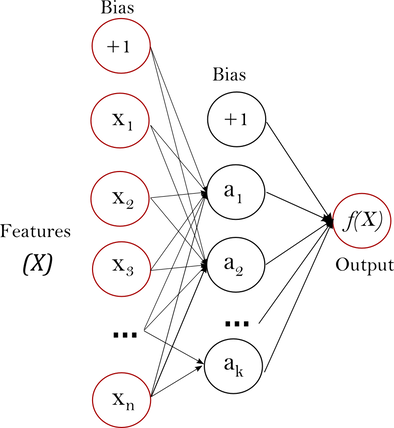

On va alors générer un modèle par station : 

In [28]:
def generate_models(scaled_data, verbose=False, compute_time=True):
    kwargs = {"hidden_layer_sizes":100,
              "activation":'logistic',
              "alpha":0.0001,
              "batch_size":'auto',
              "learning_rate":'constant',
              "learning_rate_init":0.01,
              "max_iter":1000,
              "verbose":verbose}
    models = {}
    
    time0 = time()
    for index,(X_train, X_test, y_train, y_test, X_pred, y_pred) in scaled_data.items():
        models[index] = MLPRegressor(**kwargs).fit(X_train,y_train)
    if compute_time:
        print(f"Time to train {len(models)} models : {time()-time0:.3f}")
    return models

In [29]:
models = generate_models(scaled_data, verbose=True, compute_time=True)

Iteration 1, loss = 42278.98865852
Iteration 2, loss = 40919.92050831
Iteration 3, loss = 39412.45284511
Iteration 4, loss = 37669.27326441
Iteration 5, loss = 35664.58753708
Iteration 6, loss = 33448.25969260
Iteration 7, loss = 31101.22609097
Iteration 8, loss = 28716.09222571
Iteration 9, loss = 26382.09124452
Iteration 10, loss = 24154.82775399
Iteration 11, loss = 22070.97951384
Iteration 12, loss = 20138.28136976
Iteration 13, loss = 18359.61141060
Iteration 14, loss = 16726.58062290
Iteration 15, loss = 15228.49509567
Iteration 16, loss = 13855.36684638
Iteration 17, loss = 12595.35952348
Iteration 18, loss = 11439.42305479
Iteration 19, loss = 10379.59589993
Iteration 20, loss = 9408.33810541
Iteration 21, loss = 8518.02846550
Iteration 22, loss = 7702.20448206
Iteration 23, loss = 6955.68854518
Iteration 24, loss = 6272.72231747
Iteration 25, loss = 5648.28979414
Iteration 26, loss = 5079.45148089
Iteration 27, loss = 4560.73031345
Iteration 28, loss = 4088.43283676
Iteration 

Iteration 253, loss = 2.94381188
Iteration 254, loss = 2.93847846
Iteration 255, loss = 2.93385560
Iteration 256, loss = 2.92805732
Iteration 257, loss = 2.92305515
Iteration 258, loss = 2.91855237
Iteration 259, loss = 2.91305393
Iteration 260, loss = 2.90815517
Iteration 261, loss = 2.90373118
Iteration 262, loss = 2.89819273
Iteration 263, loss = 2.89387249
Iteration 264, loss = 2.88981416
Iteration 265, loss = 2.88580046
Iteration 266, loss = 2.88138695
Iteration 267, loss = 2.87684391
Iteration 268, loss = 2.87251791
Iteration 269, loss = 2.86768697
Iteration 270, loss = 2.86300159
Iteration 271, loss = 2.85870545
Iteration 272, loss = 2.85426544
Iteration 273, loss = 2.84922084
Iteration 274, loss = 2.84532041
Iteration 275, loss = 2.84108553
Iteration 276, loss = 2.83633226
Iteration 277, loss = 2.83146880
Iteration 278, loss = 2.82724154
Iteration 279, loss = 2.82282235
Iteration 280, loss = 2.81804561
Iteration 281, loss = 2.81443268
Iteration 282, loss = 2.80892452
Iteration 

Iteration 516, loss = 1.38223161
Iteration 517, loss = 1.37673161
Iteration 518, loss = 1.37296525
Iteration 519, loss = 1.36721486
Iteration 520, loss = 1.35979959
Iteration 521, loss = 1.35763321
Iteration 522, loss = 1.35081712
Iteration 523, loss = 1.34427219
Iteration 524, loss = 1.33891097
Iteration 525, loss = 1.33248349
Iteration 526, loss = 1.32950330
Iteration 527, loss = 1.32255633
Iteration 528, loss = 1.31609643
Iteration 529, loss = 1.31041011
Iteration 530, loss = 1.30481920
Iteration 531, loss = 1.29968712
Iteration 532, loss = 1.29409147
Iteration 533, loss = 1.28763382
Iteration 534, loss = 1.28096278
Iteration 535, loss = 1.27622887
Iteration 536, loss = 1.26999472
Iteration 537, loss = 1.26463345
Iteration 538, loss = 1.25885579
Iteration 539, loss = 1.25238048
Iteration 540, loss = 1.24764657
Iteration 541, loss = 1.24564176
Iteration 542, loss = 1.23635090
Iteration 543, loss = 1.23016851
Iteration 544, loss = 1.22395084
Iteration 545, loss = 1.21979499
Iteration 

Iteration 786, loss = 0.17279548
Iteration 787, loss = 0.17106903
Iteration 788, loss = 0.16942172
Iteration 789, loss = 0.16797428
Iteration 790, loss = 0.16698741
Iteration 791, loss = 0.16712632
Iteration 792, loss = 0.17333683
Iteration 793, loss = 0.16709058
Iteration 794, loss = 0.16508842
Iteration 795, loss = 0.16271210
Iteration 796, loss = 0.16312062
Iteration 797, loss = 0.16115468
Iteration 798, loss = 0.15891940
Iteration 799, loss = 0.15745940
Iteration 800, loss = 0.15729664
Iteration 801, loss = 0.15604235
Iteration 802, loss = 0.15532697
Iteration 803, loss = 0.15462287
Iteration 804, loss = 0.15345384
Iteration 805, loss = 0.15348680
Iteration 806, loss = 0.15166118
Iteration 807, loss = 0.15200800
Iteration 808, loss = 0.15157530
Iteration 809, loss = 0.15026343
Iteration 810, loss = 0.14946289
Iteration 811, loss = 0.14917077
Iteration 812, loss = 0.15142409
Iteration 813, loss = 0.14868667
Iteration 814, loss = 0.14650516
Iteration 815, loss = 0.14615717
Iteration 

Iteration 62, loss = 49.43545722
Iteration 63, loss = 43.75497438
Iteration 64, loss = 38.86820440
Iteration 65, loss = 34.79838497
Iteration 66, loss = 31.20806215
Iteration 67, loss = 28.30919951
Iteration 68, loss = 25.80507429
Iteration 69, loss = 23.69360188
Iteration 70, loss = 21.93162282
Iteration 71, loss = 20.43804612
Iteration 72, loss = 19.16326449
Iteration 73, loss = 18.13297232
Iteration 74, loss = 17.21135697
Iteration 75, loss = 16.45707333
Iteration 76, loss = 15.81350509
Iteration 77, loss = 15.25797676
Iteration 78, loss = 14.78511618
Iteration 79, loss = 14.35538275
Iteration 80, loss = 13.99241587
Iteration 81, loss = 13.68631003
Iteration 82, loss = 13.39367988
Iteration 83, loss = 13.14586844
Iteration 84, loss = 12.91772311
Iteration 85, loss = 12.71634110
Iteration 86, loss = 12.52882705
Iteration 87, loss = 12.35104500
Iteration 88, loss = 12.18645139
Iteration 89, loss = 12.02516926
Iteration 90, loss = 11.87530737
Iteration 91, loss = 11.72761664
Iteration 

Iteration 323, loss = 4.25904942
Iteration 324, loss = 4.25024403
Iteration 325, loss = 4.24191533
Iteration 326, loss = 4.23501851
Iteration 327, loss = 4.22677140
Iteration 328, loss = 4.21757180
Iteration 329, loss = 4.20819446
Iteration 330, loss = 4.20007390
Iteration 331, loss = 4.19157253
Iteration 332, loss = 4.18439079
Iteration 333, loss = 4.17456530
Iteration 334, loss = 4.16520402
Iteration 335, loss = 4.15827953
Iteration 336, loss = 4.14863159
Iteration 337, loss = 4.14043395
Iteration 338, loss = 4.13096987
Iteration 339, loss = 4.12156877
Iteration 340, loss = 4.11296826
Iteration 341, loss = 4.10572165
Iteration 342, loss = 4.09559709
Iteration 343, loss = 4.08520961
Iteration 344, loss = 4.07779921
Iteration 345, loss = 4.06747982
Iteration 346, loss = 4.05745195
Iteration 347, loss = 4.05024107
Iteration 348, loss = 4.04029521
Iteration 349, loss = 4.02819125
Iteration 350, loss = 4.02105654
Iteration 351, loss = 4.01284755
Iteration 352, loss = 4.00270549
Iteration 

Iteration 581, loss = 1.10155637
Iteration 582, loss = 1.09145211
Iteration 583, loss = 1.08109518
Iteration 584, loss = 1.07140896
Iteration 585, loss = 1.06060591
Iteration 586, loss = 1.05222576
Iteration 587, loss = 1.04209418
Iteration 588, loss = 1.03302927
Iteration 589, loss = 1.02343729
Iteration 590, loss = 1.01146248
Iteration 591, loss = 1.00206469
Iteration 592, loss = 0.99129960
Iteration 593, loss = 0.98114683
Iteration 594, loss = 0.96904896
Iteration 595, loss = 0.96171329
Iteration 596, loss = 0.94810440
Iteration 597, loss = 0.93420993
Iteration 598, loss = 0.92282190
Iteration 599, loss = 0.90970785
Iteration 600, loss = 0.89486688
Iteration 601, loss = 0.87984008
Iteration 602, loss = 0.86544284
Iteration 603, loss = 0.84737692
Iteration 604, loss = 0.83595182
Iteration 605, loss = 0.82017107
Iteration 606, loss = 0.79917943
Iteration 607, loss = 0.78766277
Iteration 608, loss = 0.76828685
Iteration 609, loss = 0.75532457
Iteration 610, loss = 0.74067276
Iteration 

Iteration 839, loss = 0.18505369
Iteration 840, loss = 0.18506882
Iteration 841, loss = 0.18417614
Iteration 842, loss = 0.18611234
Iteration 843, loss = 0.18502243
Iteration 844, loss = 0.18581298
Iteration 845, loss = 0.18214369
Iteration 846, loss = 0.18332876
Iteration 847, loss = 0.18214885
Iteration 848, loss = 0.18022217
Iteration 849, loss = 0.17965985
Iteration 850, loss = 0.18029438
Iteration 851, loss = 0.17978139
Iteration 852, loss = 0.17851330
Iteration 853, loss = 0.17905909
Iteration 854, loss = 0.17830686
Iteration 855, loss = 0.17855647
Iteration 856, loss = 0.17824760
Iteration 857, loss = 0.17564746
Iteration 858, loss = 0.17665107
Iteration 859, loss = 0.17867556
Iteration 860, loss = 0.17639933
Iteration 861, loss = 0.17451586
Iteration 862, loss = 0.17588666
Iteration 863, loss = 0.17367472
Iteration 864, loss = 0.17329770
Iteration 865, loss = 0.17313856
Iteration 866, loss = 0.17243177
Iteration 867, loss = 0.17251034
Iteration 868, loss = 0.17355544
Iteration 

Iteration 97, loss = 7.74273820
Iteration 98, loss = 7.60600041
Iteration 99, loss = 7.47580698
Iteration 100, loss = 7.35223318
Iteration 101, loss = 7.23440786
Iteration 102, loss = 7.12856815
Iteration 103, loss = 7.02765959
Iteration 104, loss = 6.93559694
Iteration 105, loss = 6.85128668
Iteration 106, loss = 6.77569930
Iteration 107, loss = 6.70146577
Iteration 108, loss = 6.63604675
Iteration 109, loss = 6.57419226
Iteration 110, loss = 6.51898846
Iteration 111, loss = 6.47268147
Iteration 112, loss = 6.42337293
Iteration 113, loss = 6.37938922
Iteration 114, loss = 6.33922101
Iteration 115, loss = 6.30090061
Iteration 116, loss = 6.26301378
Iteration 117, loss = 6.22699768
Iteration 118, loss = 6.18996776
Iteration 119, loss = 6.15566886
Iteration 120, loss = 6.12241977
Iteration 121, loss = 6.09025952
Iteration 122, loss = 6.06022502
Iteration 123, loss = 6.02939092
Iteration 124, loss = 5.99940652
Iteration 125, loss = 5.96943705
Iteration 126, loss = 5.93834346
Iteration 127

Iteration 364, loss = 2.88253794
Iteration 365, loss = 2.87524808
Iteration 366, loss = 2.86852361
Iteration 367, loss = 2.86458643
Iteration 368, loss = 2.85740669
Iteration 369, loss = 2.85073381
Iteration 370, loss = 2.84486884
Iteration 371, loss = 2.83816861
Iteration 372, loss = 2.83121157
Iteration 373, loss = 2.82553831
Iteration 374, loss = 2.81882268
Iteration 375, loss = 2.81297151
Iteration 376, loss = 2.80671347
Iteration 377, loss = 2.80002949
Iteration 378, loss = 2.79304435
Iteration 379, loss = 2.78811457
Iteration 380, loss = 2.78171947
Iteration 381, loss = 2.77476452
Iteration 382, loss = 2.76869829
Iteration 383, loss = 2.76229803
Iteration 384, loss = 2.75671899
Iteration 385, loss = 2.75046202
Iteration 386, loss = 2.74332094
Iteration 387, loss = 2.73849347
Iteration 388, loss = 2.73299552
Iteration 389, loss = 2.72599564
Iteration 390, loss = 2.71944412
Iteration 391, loss = 2.71289009
Iteration 392, loss = 2.70742413
Iteration 393, loss = 2.70095656
Iteration 

Iteration 632, loss = 0.45034019
Iteration 633, loss = 0.45347785
Iteration 634, loss = 0.44802365
Iteration 635, loss = 0.44294091
Iteration 636, loss = 0.44037964
Iteration 637, loss = 0.43578602
Iteration 638, loss = 0.43350641
Iteration 639, loss = 0.43011319
Iteration 640, loss = 0.42740766
Iteration 641, loss = 0.42502454
Iteration 642, loss = 0.42203411
Iteration 643, loss = 0.42160276
Iteration 644, loss = 0.41852188
Iteration 645, loss = 0.41592899
Iteration 646, loss = 0.41238168
Iteration 647, loss = 0.40971877
Iteration 648, loss = 0.40723643
Iteration 649, loss = 0.40544853
Iteration 650, loss = 0.40291267
Iteration 651, loss = 0.40048141
Iteration 652, loss = 0.39760799
Iteration 653, loss = 0.39618201
Iteration 654, loss = 0.40916158
Iteration 655, loss = 0.40562795
Iteration 656, loss = 0.38959650
Iteration 657, loss = 0.38800867
Iteration 658, loss = 0.38339279
Iteration 659, loss = 0.38122218
Iteration 660, loss = 0.37820740
Iteration 661, loss = 0.37569967
Iteration 

Iteration 882, loss = 0.08985015
Iteration 883, loss = 0.08917064
Iteration 884, loss = 0.08893735
Iteration 885, loss = 0.08868544
Iteration 886, loss = 0.08866522
Iteration 887, loss = 0.08838860
Iteration 888, loss = 0.08791365
Iteration 889, loss = 0.08799633
Iteration 890, loss = 0.08778231
Iteration 891, loss = 0.08782635
Iteration 892, loss = 0.08795332
Iteration 893, loss = 0.08746153
Iteration 894, loss = 0.08760197
Iteration 895, loss = 0.08760557
Iteration 896, loss = 0.08753424
Iteration 897, loss = 0.08674745
Iteration 898, loss = 0.08640264
Iteration 899, loss = 0.08623180
Iteration 900, loss = 0.08565370
Iteration 901, loss = 0.08554004
Iteration 902, loss = 0.08539163
Iteration 903, loss = 0.08559350
Iteration 904, loss = 0.08522230
Iteration 905, loss = 0.08496442
Iteration 906, loss = 0.08480738
Iteration 907, loss = 0.08485848
Iteration 908, loss = 0.08509258
Iteration 909, loss = 0.08470308
Iteration 910, loss = 0.08426713
Iteration 911, loss = 0.08444346
Iteration 

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 42110.22067651
Iteration 2, loss = 40741.74614917
Iteration 3, loss = 39225.11691268
Iteration 4, loss = 37473.06849109
Iteration 5, loss = 35466.57784293
Iteration 6, loss = 33253.49769223
Iteration 7, loss = 30912.46008349
Iteration 8, loss = 28538.68437106
Iteration 9, loss = 26212.47495177
Iteration 10, loss = 23995.43514972
Iteration 11, loss = 21921.10047529
Iteration 12, loss = 19999.06189013
Iteration 13, loss = 18230.29299820
Iteration 14, loss = 16605.49606726
Iteration 15, loss = 15116.33925870
Iteration 16, loss = 13750.21484320
Iteration 17, loss = 12496.96183858
Iteration 18, loss = 11348.53634834
Iteration 19, loss = 10295.04855895
Iteration 20, loss = 9328.66077708
Iteration 21, loss = 8443.80741192
Iteration 22, loss = 7633.38677872
Iteration 23, loss = 6891.13577797
Iteration 24, loss = 6212.41763636
Iteration 25, loss = 5593.07150310
Iteration 26, loss = 5027.97559072
Iteration 27, loss = 4513.23246134
Iteration 28, loss = 4044.95552038
Iteration 

Iteration 249, loss = 10.01924486
Iteration 250, loss = 10.01620052
Iteration 251, loss = 10.01455731
Iteration 252, loss = 10.01148937
Iteration 253, loss = 10.00923324
Iteration 254, loss = 10.00633966
Iteration 255, loss = 10.00426720
Iteration 256, loss = 10.00141277
Iteration 257, loss = 9.99859077
Iteration 258, loss = 9.99545050
Iteration 259, loss = 9.99267103
Iteration 260, loss = 9.99104887
Iteration 261, loss = 9.98564892
Iteration 262, loss = 9.98192769
Iteration 263, loss = 9.97784127
Iteration 264, loss = 9.97380534
Iteration 265, loss = 9.96914887
Iteration 266, loss = 9.96553511
Iteration 267, loss = 9.96153736
Iteration 268, loss = 9.95614024
Iteration 269, loss = 9.95145578
Iteration 270, loss = 9.94640297
Iteration 271, loss = 9.94080732
Iteration 272, loss = 9.93623887
Iteration 273, loss = 9.93084729
Iteration 274, loss = 9.92502197
Iteration 275, loss = 9.91899884
Iteration 276, loss = 9.91296911
Iteration 277, loss = 9.90658093
Iteration 278, loss = 9.90053981
It

Iteration 510, loss = 3.23887732
Iteration 511, loss = 3.23110597
Iteration 512, loss = 3.22968644
Iteration 513, loss = 3.22358647
Iteration 514, loss = 3.21977203
Iteration 515, loss = 3.21583782
Iteration 516, loss = 3.21189643
Iteration 517, loss = 3.20700035
Iteration 518, loss = 3.20379252
Iteration 519, loss = 3.19903778
Iteration 520, loss = 3.19473159
Iteration 521, loss = 3.19084477
Iteration 522, loss = 3.18576234
Iteration 523, loss = 3.18263339
Iteration 524, loss = 3.17762136
Iteration 525, loss = 3.17547321
Iteration 526, loss = 3.17116458
Iteration 527, loss = 3.16757420
Iteration 528, loss = 3.16470552
Iteration 529, loss = 3.15910779
Iteration 530, loss = 3.15577811
Iteration 531, loss = 3.14927646
Iteration 532, loss = 3.14211249
Iteration 533, loss = 3.13960896
Iteration 534, loss = 3.13626311
Iteration 535, loss = 3.13236527
Iteration 536, loss = 3.12590041
Iteration 537, loss = 3.12175566
Iteration 538, loss = 3.11684517
Iteration 539, loss = 3.11279693
Iteration 

Iteration 764, loss = 2.64881251
Iteration 765, loss = 2.64829846
Iteration 766, loss = 2.64583532
Iteration 767, loss = 2.64552808
Iteration 768, loss = 2.64356406
Iteration 769, loss = 2.64244423
Iteration 770, loss = 2.64332146
Iteration 771, loss = 2.64139579
Iteration 772, loss = 2.64017773
Iteration 773, loss = 2.63793390
Iteration 774, loss = 2.63544311
Iteration 775, loss = 2.63314320
Iteration 776, loss = 2.63453665
Iteration 777, loss = 2.63196377
Iteration 778, loss = 2.62733184
Iteration 779, loss = 2.62958481
Iteration 780, loss = 2.62587220
Iteration 781, loss = 2.62587553
Iteration 782, loss = 2.62174972
Iteration 783, loss = 2.62168400
Iteration 784, loss = 2.62079276
Iteration 785, loss = 2.61981470
Iteration 786, loss = 2.61906815
Iteration 787, loss = 2.61538699
Iteration 788, loss = 2.61795069
Iteration 789, loss = 2.61339840
Iteration 790, loss = 2.60954362
Iteration 791, loss = 2.61167230
Iteration 792, loss = 2.60814552
Iteration 793, loss = 2.60655673
Iteration 

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 15884.23146254
Iteration 16, loss = 14409.92997105
Iteration 17, loss = 13055.58439238
Iteration 18, loss = 11813.12089977
Iteration 19, loss = 10675.57860208
Iteration 20, loss = 9636.21281114
Iteration 21, loss = 8685.61829482
Iteration 22, loss = 7819.12809246
Iteration 23, loss = 7029.11956581
Iteration 24, loss = 6309.53216389
Iteration 25, loss = 5655.20560066
Iteration 26, loss = 5060.95281994
Iteration 27, loss = 4521.96180414
Iteration 28, loss = 4034.14155149
Iteration 29, loss = 3592.60848518
Iteration 30, loss = 3194.93736078
Iteration 31, loss = 2835.74423658
Iteration 32, loss = 2513.01420186
Iteration 33, loss = 2223.11135416
Iteration 34, loss = 1963.11284359
Iteration 35, loss = 1730.51673687
Iteration 36, loss = 1522.57708871
Iteration 37, loss = 1337.46377305
Iteration 38, loss = 1172.78386920
Iteration 39, loss = 1026.37407324
Iteration 40, loss = 896.86835509
Iteration 41, loss = 782.28788715
Iteration 42, loss = 680.91015033
Iteration 43, loss

Iteration 270, loss = 9.45790900
Iteration 271, loss = 9.45801435
Iteration 272, loss = 9.45754977
Iteration 273, loss = 9.45651557
Iteration 274, loss = 9.45672365
Iteration 275, loss = 9.45720963
Iteration 276, loss = 9.45692273
Iteration 277, loss = 9.45528828
Iteration 278, loss = 9.45487705
Iteration 279, loss = 9.45396179
Iteration 280, loss = 9.45382236
Iteration 281, loss = 9.45353974
Iteration 282, loss = 9.45295995
Iteration 283, loss = 9.45268509
Iteration 284, loss = 9.45216108
Iteration 285, loss = 9.45310880
Iteration 286, loss = 9.45094491
Iteration 287, loss = 9.45044024
Iteration 288, loss = 9.45048073
Iteration 289, loss = 9.44977324
Iteration 290, loss = 9.44927364
Iteration 291, loss = 9.44878068
Iteration 292, loss = 9.44796845
Iteration 293, loss = 9.44859964
Iteration 294, loss = 9.44714881
Iteration 295, loss = 9.44785758
Iteration 296, loss = 9.44660644
Iteration 297, loss = 9.44508274
Iteration 298, loss = 9.44468636
Iteration 299, loss = 9.44424887
Iteration 

Iteration 542, loss = 7.74070579
Iteration 543, loss = 7.73697136
Iteration 544, loss = 7.73415889
Iteration 545, loss = 7.73124620
Iteration 546, loss = 7.73284703
Iteration 547, loss = 7.73167084
Iteration 548, loss = 7.72464684
Iteration 549, loss = 7.71707371
Iteration 550, loss = 7.72000231
Iteration 551, loss = 7.72053440
Iteration 552, loss = 7.71229448
Iteration 553, loss = 7.71588347
Iteration 554, loss = 7.70576075
Iteration 555, loss = 7.70649571
Iteration 556, loss = 7.70682982
Iteration 557, loss = 7.70577532
Iteration 558, loss = 7.70218428
Iteration 559, loss = 7.69954411
Iteration 560, loss = 7.69917983
Iteration 561, loss = 7.70053650
Iteration 562, loss = 7.69907033
Iteration 563, loss = 7.69915421
Iteration 564, loss = 7.69716594
Iteration 565, loss = 7.69010440
Iteration 566, loss = 7.68673035
Iteration 567, loss = 7.69278960
Iteration 568, loss = 7.69200980
Iteration 569, loss = 7.68832013
Iteration 570, loss = 7.69084364
Iteration 571, loss = 7.68391379
Iteration 

Iteration 83, loss = 10.91931193
Iteration 84, loss = 10.70910232
Iteration 85, loss = 10.52888402
Iteration 86, loss = 10.36316502
Iteration 87, loss = 10.20907465
Iteration 88, loss = 10.06381408
Iteration 89, loss = 9.92852249
Iteration 90, loss = 9.79706760
Iteration 91, loss = 9.66781632
Iteration 92, loss = 9.54059645
Iteration 93, loss = 9.42322208
Iteration 94, loss = 9.30333046
Iteration 95, loss = 9.18829782
Iteration 96, loss = 9.06895170
Iteration 97, loss = 8.95359336
Iteration 98, loss = 8.83284658
Iteration 99, loss = 8.71470092
Iteration 100, loss = 8.59382220
Iteration 101, loss = 8.47584217
Iteration 102, loss = 8.35385897
Iteration 103, loss = 8.23425965
Iteration 104, loss = 8.11508455
Iteration 105, loss = 7.99330357
Iteration 106, loss = 7.87557664
Iteration 107, loss = 7.75510111
Iteration 108, loss = 7.63829544
Iteration 109, loss = 7.52155191
Iteration 110, loss = 7.40326618
Iteration 111, loss = 7.28879217
Iteration 112, loss = 7.17671856
Iteration 113, loss =

Iteration 346, loss = 2.30068140
Iteration 347, loss = 2.29574079
Iteration 348, loss = 2.29030664
Iteration 349, loss = 2.28506198
Iteration 350, loss = 2.28055336
Iteration 351, loss = 2.27599765
Iteration 352, loss = 2.27057240
Iteration 353, loss = 2.26558529
Iteration 354, loss = 2.26013783
Iteration 355, loss = 2.25491387
Iteration 356, loss = 2.25021630
Iteration 357, loss = 2.24436258
Iteration 358, loss = 2.23910452
Iteration 359, loss = 2.23418302
Iteration 360, loss = 2.22899702
Iteration 361, loss = 2.22382242
Iteration 362, loss = 2.21880604
Iteration 363, loss = 2.21371037
Iteration 364, loss = 2.20867540
Iteration 365, loss = 2.20369280
Iteration 366, loss = 2.19812152
Iteration 367, loss = 2.19307075
Iteration 368, loss = 2.18791186
Iteration 369, loss = 2.18324700
Iteration 370, loss = 2.17743454
Iteration 371, loss = 2.17146855
Iteration 372, loss = 2.16578113
Iteration 373, loss = 2.16069415
Iteration 374, loss = 2.15506857
Iteration 375, loss = 2.14972848
Iteration 

Iteration 596, loss = 0.80330636
Iteration 597, loss = 0.79945840
Iteration 598, loss = 0.79614832
Iteration 599, loss = 0.79170361
Iteration 600, loss = 0.78772969
Iteration 601, loss = 0.78347091
Iteration 602, loss = 0.78010149
Iteration 603, loss = 0.77631266
Iteration 604, loss = 0.77280175
Iteration 605, loss = 0.76902859
Iteration 606, loss = 0.76531242
Iteration 607, loss = 0.76156842
Iteration 608, loss = 0.75962772
Iteration 609, loss = 0.75503268
Iteration 610, loss = 0.75152315
Iteration 611, loss = 0.74880525
Iteration 612, loss = 0.74538159
Iteration 613, loss = 0.74242301
Iteration 614, loss = 0.74006132
Iteration 615, loss = 0.73622893
Iteration 616, loss = 0.73393485
Iteration 617, loss = 0.73043065
Iteration 618, loss = 0.72789866
Iteration 619, loss = 0.72479577
Iteration 620, loss = 0.72231867
Iteration 621, loss = 0.71978086
Iteration 622, loss = 0.71650389
Iteration 623, loss = 0.71442229
Iteration 624, loss = 0.71119482
Iteration 625, loss = 0.70950892
Iteration 

Iteration 860, loss = 0.27479582
Iteration 861, loss = 0.27322209
Iteration 862, loss = 0.27058722
Iteration 863, loss = 0.27124798
Iteration 864, loss = 0.27060863
Iteration 865, loss = 0.26934032
Iteration 866, loss = 0.26843660
Iteration 867, loss = 0.26668594
Iteration 868, loss = 0.26446216
Iteration 869, loss = 0.26308859
Iteration 870, loss = 0.26192615
Iteration 871, loss = 0.26465386
Iteration 872, loss = 0.26228514
Iteration 873, loss = 0.25875966
Iteration 874, loss = 0.25880916
Iteration 875, loss = 0.25608611
Iteration 876, loss = 0.25483937
Iteration 877, loss = 0.25495938
Iteration 878, loss = 0.25287900
Iteration 879, loss = 0.25269426
Iteration 880, loss = 0.25165116
Iteration 881, loss = 0.25080534
Iteration 882, loss = 0.25315753
Iteration 883, loss = 0.25068454
Iteration 884, loss = 0.24707665
Iteration 885, loss = 0.24536154
Iteration 886, loss = 0.24508452
Iteration 887, loss = 0.24570554
Iteration 888, loss = 0.24346042
Iteration 889, loss = 0.24277376
Iteration 

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
def display_loss(models):
    n = len(models)
    fig,ax = plt.subplots(1,n,figsize = (15,5))
    fig.subplots_adjust(wspace=0.4)
    i=0
    for index,model in models.items():
        ax[i].plot([i+1 for i in range(len(model.loss_curve_))],model.loss_curve_)
        ax[i].set_title(f'Loss for station {index}')
        ax[i].set_xlabel('Epoch')
        ax[i].set_ylabel('Loss')
        i+=1

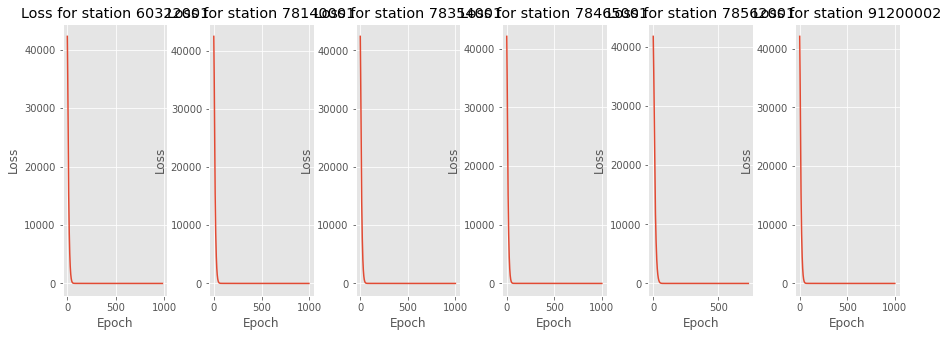

In [31]:
display_loss(models)

On ve ensuite créer une fonction qui score les modèles en fonction de `X_test` et `y_test`

In [32]:
def score_models(models, scaled_data):
    scores = {}
    for i,regr in models.items():
        X_test,y_test = scaled_data[i][1], scaled_data[i][3]
        scores[i] = regr.score(X_test,y_test)
    return scores

In [33]:
scores = score_models(models, scaled_data)
scores

{60322001: 0.9894172272965374,
 78140001: 0.9903722676497436,
 78354001: 0.9944289807081473,
 78465001: 0.8333349522056572,
 78562001: 0.4001550445381262,
 91200002: 0.988189223574093}

## Prédictions sur 24h

On va enfin pouvoir prédire la température pour chaque station via la fonction suivante : 

Cette fonction se charge aussi d'afficher les résultats de prédiction

In [34]:
def pred(models,scaled_data,display=True):
    l = {}
    for i,model in models.items():
        pred = model.predict(scaled_data[i][4])
        l[i] = pred
    
    if display:
        n = len(l)
        dates = pd.to_datetime(prep_data[id_stations.iloc[0]][4]['date'])
        fig,ax = plt.subplots(n,1,figsize = (15,n*5))
        fig.subplots_adjust(hspace=0.5)
        i=0
        for index,pred in l.items():
            ax[i].plot(dates,pred,label='Prediction')
            ax[i].plot(dates,scaled_data[index][5],label='Temperature réelle')
            ax[i].set_title(f'Station {index}')
            ax[i].set_xlabel('Temps')
            ax[i].set_ylabel('Température')
            ax[i].legend()
            i+=1
    
    return l

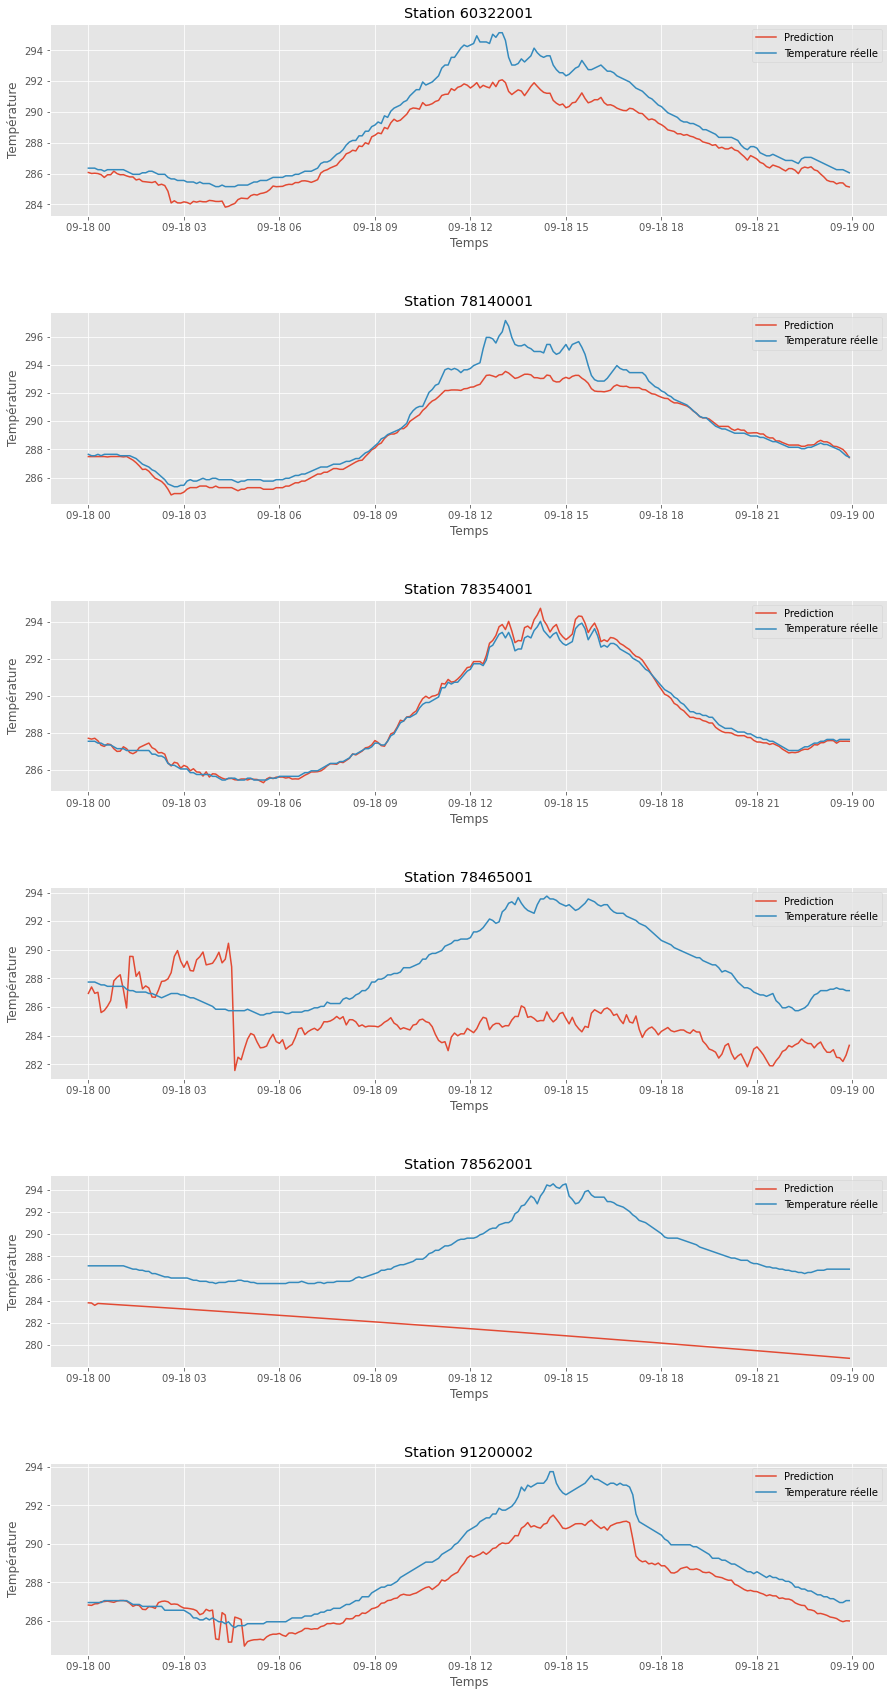

In [35]:
preds24h = pred(models,scaled_data)

On remarque que pour certaines stations la prédiction se fait très bien alors que pour d'autre cela est bien moins bon. Cela est dû au fait que les stations où l'apprentissage se fait mal étaient constituées de beaucoup de `NaN`. Si on affiche la dataframe de la station 1 et la station 2 on peut remarquer ce phénoméne : 

In [36]:
dfs_train[id_stations.iloc[0]]

,lat,lon,height_sta,date,dd,ff,precip,hu,td,t
0,48.527,1.995,116.0,1473465600000000000,0.0,0.0,0.0,93.0,282.95,284.05
1,48.527,1.995,116.0,1473465960000000000,260.0,0.5,0.0,94.0,283.25,284.15
2,48.527,1.995,116.0,1473466320000000000,260.0,0.8,0.0,94.0,283.25,284.15
3,48.527,1.995,116.0,1473466680000000000,260.0,0.9,0.0,95.0,283.35,284.15
4,48.527,1.995,116.0,1473467040000000000,270.0,1.0,0.0,94.0,283.05,283.95
...,...,...,...,...,...,...,...,...,...,...
1915,48.527,1.995,116.0,1474155000000000000,120.0,0.6,0.0,96.0,286.35,286.95
1916,48.527,1.995,116.0,1474155360000000000,110.0,1.0,0.0,97.0,286.45,286.95
1917,48.527,1.995,116.0,1474155720000000000,110.0,1.2,0.0,97.0,286.45,286.95
1918,48.527,1.995,116.0,1474156080000000000,100.0,1.1,0.0,97.0,286.45,286.95


On a donc une fonction qui nous permet de créer un modèle de `sklearn.neural_network.MLPRegressor` qui permet de prédire la température sur 24h dans des configurations où les données le permettent. On peut alors passer à l'interpolation de ces températures pour prédire la température à Paris

---

## 3. Interpolation des données


Nous essaierons dans cette partie de déterminer la température à Paris en fonction des prévisions faites précédemment

In [37]:
dist_sta

,number_sta,lat,lon,dist
248,91200002,48.527,1.995,0.447833
203,78140001,48.964,1.925,0.455545
206,78562001,48.707,1.746,0.611118
205,78465001,48.860,1.694,0.658738
169,60322001,49.310,1.880,0.693542
204,78354001,48.960,1.670,0.698570


On va ajouter à la dataframe précédente une colonne avec le score du modèle associé à la station et indexer la dataframe par le `number_sta`

In [38]:
def get_infos_stations():
    df_temp = dist_sta.set_index('number_sta')
    score_column = pd.DataFrame(scores,index=['score']).transpose()

    df_temp = pd.concat([df_temp,score_column],axis=1)    
    return df_temp

La fonction `select_sta_from_score` (ci-dessous) selectionne les stations dont le modèle à donné un score superieur à `min_score`.

In [39]:
def select_sta_from_score(min_score):
    infos_sta = get_infos_stations()
    return list(infos_sta[infos_sta['score']>min_score].index)

In [40]:
select_sta_from_score(0.9)

[60322001, 78140001, 78354001, 91200002]

## Interpolation à Paris

On va donc conserver seulement les stations qui ont un score superieur à `MIN_SCORE`

In [41]:
MIN_SCORE = 0.9

In [42]:
infos_sta = get_infos_stations().loc[select_sta_from_score(0.9)]
infos_sta

,lat,lon,dist,score
60322001,49.310,1.880,0.693542,0.989417
78140001,48.964,1.925,0.455545,0.990372
78354001,48.960,1.670,0.698570,0.994429
91200002,48.527,1.995,0.447833,0.988189


Pour représenter la positions des stations restantes par rapport à Paris on implémente la fonction `show_stations`.
* En bleu : Paris
* En couleur : La station concernée
* En pointillée : la distance entre Paris et une station

In [43]:
def show_stations(min_score):
    # Selection of stations :
    infos_sta = get_infos_stations().loc[select_sta_from_score(min_score)]

    plt.figure(figsize=(7,7))
    for station in infos_sta.index:
        plt.plot([infos_sta.loc[station,'lon'],LON_PARIS], [infos_sta.loc[station,'lat'],LAT_PARIS], '--o', label=station)
    plt.plot([LON_PARIS],[LAT_PARIS], 'bo', label='Paris')
    plt.legend()

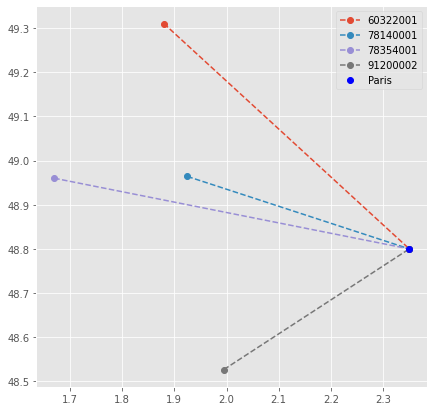

In [44]:
show_stations(MIN_SCORE)

On définit la fonction `get_temps_in_Paris` qui interpole les résultat des modèles en fonctino de la distance qui les sépare à Paris

On prend ici la moyenne des températures des stations les plus proches de Paris pondérée par leur proximité

In [45]:
def get_temps_in_Paris(output_model,min_score=0.9,verbose=True):
    """
    Interpolate model data at Paris with a mean from distance
    return : array-like of temperatures in Paris
    """
    
    # Selection of stations :
    infos_sta = get_infos_stations().loc[select_sta_from_score(min_score)]
    stations_left = list(infos_sta.index)
    
    if verbose:
        print(f"Now working with {len(stations_left)} stations : ")
        print(f"\t{stations_left}")
    if len(stations_left) == 0:
        return np.array()
    
    # Selection of outputs for selected stations
    output_from_selected_stations = {index : x for index, x in output_model.items() if index in infos_sta.index}
    
    # Scaling distance with distance
    max_dist = infos_sta['dist'].max()
    infos_sta['dist'] = infos_sta['dist']/max_dist
    
    # Mean
    array_size = len(list(output_from_selected_stations.values())[0])
    mean = np.zeros(array_size)
    for station, scaled_dist in infos_sta['dist'].items():
        mean += scaled_dist * output_from_selected_stations[station]
    return mean/sum(infos_sta['dist'])

In [46]:
temps_in_Paris = get_temps_in_Paris(preds24h, min_score=MIN_SCORE)

Now working with 4 stations : 
	[60322001, 78140001, 78354001, 91200002]


On implémente ensuite une fonction de visualisation : `display_temps` avec pour arguments : 
* `output_from_models` : les courbes de températuresen sortie des modèles
* `min_score` : le score minimum des modèles que l'on considère comme acceptable (ici = `MIN_SCORE`)
* `show_stations` : afficher les autres stations en pointillées

In [52]:
def display_temps(output_from_models, min_score, show_stations=True):
    
    stations_left = list(get_infos_stations().loc[select_sta_from_score(min_score)].index)
    
    plt.figure(figsize=(15, 5))
    plt.xlabel('Temps')
    plt.ylabel('Température')
    plt.title('Prédiction de la température à Paris')

    dates = pd.to_datetime(prep_data[id_stations.iloc[0]][4]['date'])
    plt.plot(dates, temps_in_Paris, label='Temperature à Paris')
    if not show_stations:
        return
    for station in stations_left:
        plt.plot(dates, output_from_models[station],'--',label=station)
    plt.legend()

Température seule à Paris

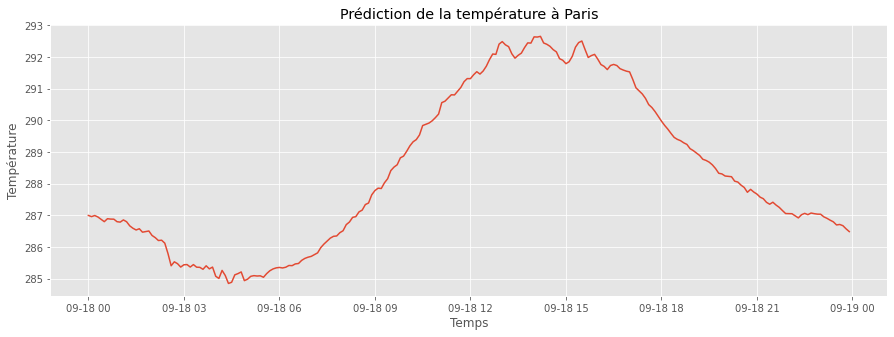

In [53]:
display_temps(preds24h,MIN_SCORE,show_stations=False)

Température à Paris avec les stations selectionnées

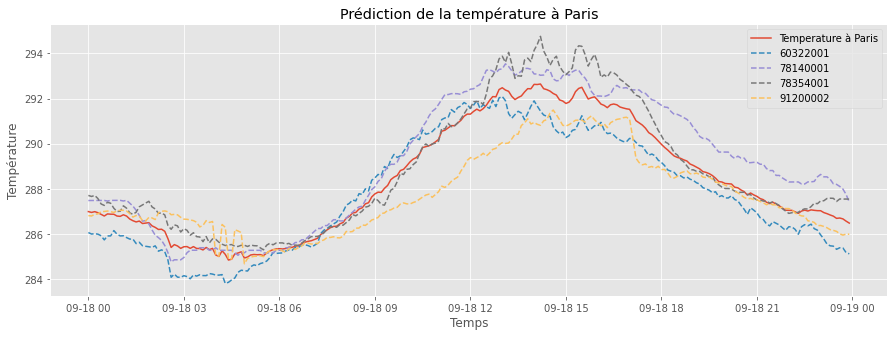

In [54]:
display_temps(preds24h,MIN_SCORE)